In [1]:
!apt install swig cmake libopenmpi-dev zlib1g-dev
!pip install stable-baselines==2.5.1 box2d box2d-kengz



Reading package lists... Done
Building dependency tree       
Reading state information... Done
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
zlib1g-dev set to manually installed.
libopenmpi-dev is already the newest version (2.1.1-8).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 59 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,

In [3]:
import random
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from google.colab import files


In [4]:

class DQNAgent:
  def __init__(self, environment):
    self.env = environment
    #training model
    self.model = self.start_model()
    self.targetmodel = self.start_model()
    self.epsilon = 1.0
    self.epsilon_decay = 0.99
    self.alpha = .001
    self.gamma = 0.99
    self.memorySize = 10000
    self.layerNodes = 32
    self.batch_size = 64
    #target model
    self.target_model = self.start_model()
    self.replay = deque(maxlen = self.memorySize)
    self.stepcount = 0

  def start_model(self):
    """create NN using keras"""

    model = Sequential()
    model.add(Dense(64, input_dim = self.env.observation_space.shape[0],activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(self.env.action_space.n))
    model.compile(loss="mean_squared_error",optimizer=Adam(lr=.001))
    return model

  def update_replay(self, state, action, reward, new_state, done):
    """update the replay buffer"""
    self.replay.append([state, action, reward, new_state, done])

  def take_action(self, current_state):
    """take an action, greedy epsilon"""
    if np.random.random() < self.epsilon:
      return self.env.action_space.sample()
    else:
      return np.argmax(self.model.predict(current_state)[0])
  

  def replay_memory(self):
    
    self.stepcount = (self.stepcount+1)%4
    if self.stepcount == 0:
      if len(self.replay) < self.batch_size:
        return
      batch = random.sample(self.replay, self.batch_size)
      batch_states = []
      batch_forecasts = []
      for state, action, reward, next_state, done in batch:
        if done:
          target = reward
        elif not done:
          target = (reward+self.gamma * np.amax(self.targetmodel.predict(next_state)[0]))
        target_f = self.model.predict(state)
        
        target_f[0][action] = target
        
        batch_states.append(state[0])
        batch_forecasts.append(target_f[0])
      batch_states = np.array(batch_states)
      batch_forecasts = np.array(batch_forecasts)
      self.model.fit(batch_states, batch_forecasts, epochs=1, verbose=0)
      
      target_weights = np.array(self.targetmodel.get_weights())
      current_weights = np.array(self.model.get_weights())
      self.targetmodel.set_weights(target_weights)

    
      



In [5]:
def plotchart(xval,yval,xlabel,ylabel,title,filename):
  plt.plot(xval,yval)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.title(title)
  plt.savefig(filename)

  #files.download(filename)
  plt.show()
  plt.close()

environment = gym.make('LunarLander-v2')
environment = environment.unwrapped



environment.reset()
agent = DQNAgent(environment = environment)

episode: 0/1000, score: -326.6496277700736, e: 1.0


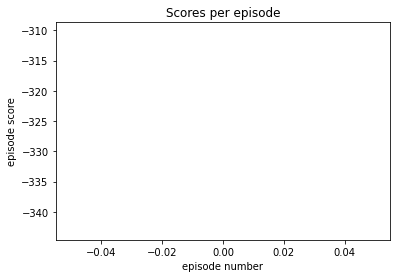

episode: 1/1000, score: -123.49526277183784, e: 0.99
episode: 2/1000, score: -258.18715230823136, e: 0.98
episode: 3/1000, score: -113.18750373179597, e: 0.97
episode: 4/1000, score: -120.6062213781744, e: 0.96
episode: 5/1000, score: -145.89389405599866, e: 0.95
episode: 6/1000, score: -344.28740016747827, e: 0.94
episode: 7/1000, score: -350.8251594467255, e: 0.93
episode: 8/1000, score: -192.1615371188517, e: 0.92
episode: 9/1000, score: -117.61592805552678, e: 0.91
episode: 10/1000, score: -65.10622188437802, e: 0.9
episode: 11/1000, score: -118.9321989200327, e: 0.9
episode: 12/1000, score: -252.47105144520663, e: 0.89
episode: 13/1000, score: -366.0817535604502, e: 0.88
episode: 14/1000, score: -457.33704535418804, e: 0.87
episode: 15/1000, score: -94.28958076728738, e: 0.86
episode: 16/1000, score: -63.295670339986266, e: 0.85
episode: 17/1000, score: -357.70141216209026, e: 0.84
episode: 18/1000, score: -142.34465916419694, e: 0.83
episode: 19/1000, score: -443.3146037078559, e

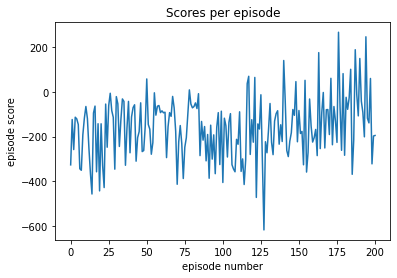

episode: 201/1000, score: -51.38434982817625, e: 0.13
episode: 202/1000, score: -243.87686371740432, e: 0.13
episode: 203/1000, score: -222.0199540879844, e: 0.13
episode: 204/1000, score: -2.0053508043092165, e: 0.13
episode: 205/1000, score: -218.1976122534685, e: 0.13
episode: 206/1000, score: -262.68924711878856, e: 0.13
episode: 207/1000, score: -366.1404753125735, e: 0.12
episode: 208/1000, score: -50.62957914412742, e: 0.12
episode: 209/1000, score: -35.39689005820405, e: 0.12
episode: 210/1000, score: -229.5102670884005, e: 0.12
episode: 211/1000, score: -273.8697810763296, e: 0.12
episode: 212/1000, score: -25.996878126281473, e: 0.12
episode: 213/1000, score: 225.82289389675321, e: 0.12
episode: 214/1000, score: 9.408592746865864, e: 0.12
episode: 215/1000, score: -300.7902534209922, e: 0.12
episode: 216/1000, score: 268.5982234995709, e: 0.11
episode: 217/1000, score: -238.0727345149845, e: 0.11
episode: 218/1000, score: -427.16247622380945, e: 0.11
episode: 219/1000, score:

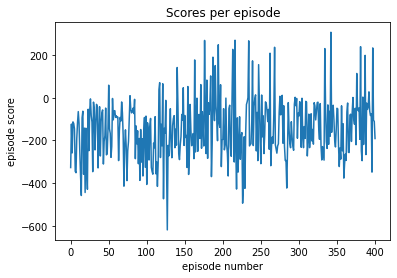

episode: 401/1000, score: -232.9075182557993, e: 0.018
episode: 402/1000, score: -19.034306375540822, e: 0.018
episode: 403/1000, score: -208.43005439939495, e: 0.017
episode: 404/1000, score: -60.54279449104229, e: 0.017
episode: 405/1000, score: -228.68657205910688, e: 0.017
episode: 406/1000, score: -248.14188032480448, e: 0.017
episode: 407/1000, score: -267.12586349917285, e: 0.017
episode: 408/1000, score: -271.65072120497575, e: 0.017
episode: 409/1000, score: -42.47050720530944, e: 0.016
episode: 410/1000, score: -102.22794770233419, e: 0.016
episode: 411/1000, score: -39.748383232598286, e: 0.016
episode: 412/1000, score: -73.14990528080153, e: 0.016
episode: 413/1000, score: -434.16908772006366, e: 0.016
episode: 414/1000, score: -429.86182599941577, e: 0.016
episode: 415/1000, score: -90.00428954803456, e: 0.015
episode: 416/1000, score: -361.951669826869, e: 0.015
episode: 417/1000, score: -287.63616982147124, e: 0.015
episode: 418/1000, score: -334.8518985030267, e: 0.015


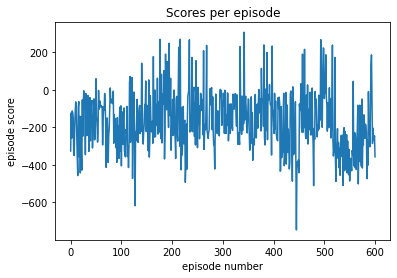

episode: 601/1000, score: -438.7577192540771, e: 0.0099
episode: 602/1000, score: -218.2893818096971, e: 0.0099
episode: 603/1000, score: -296.3229320718664, e: 0.0099
episode: 604/1000, score: -242.38951297985886, e: 0.0099
episode: 605/1000, score: -194.09085557638693, e: 0.0099
episode: 606/1000, score: -215.08608366426313, e: 0.0099
episode: 607/1000, score: -59.85613772073161, e: 0.0099
episode: 608/1000, score: -6.423923669504816, e: 0.0099
episode: 609/1000, score: -192.54597392455977, e: 0.0099
episode: 610/1000, score: -226.64194095233304, e: 0.0099
episode: 611/1000, score: -77.06762907844477, e: 0.0099
episode: 612/1000, score: -284.7551867958154, e: 0.0099
episode: 613/1000, score: 244.26625113486267, e: 0.0099
episode: 614/1000, score: -213.29111403328017, e: 0.0099
episode: 615/1000, score: -273.1618806386847, e: 0.0099
episode: 616/1000, score: -178.97927784923291, e: 0.0099
episode: 617/1000, score: -232.06235425192781, e: 0.0099
episode: 618/1000, score: -37.3789745193

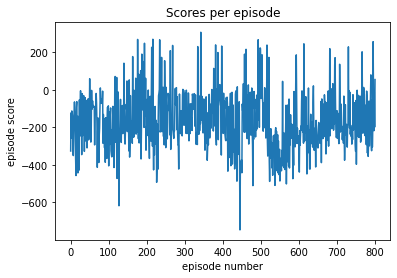

episode: 801/1000, score: -148.82083236326145, e: 0.0099
episode: 802/1000, score: -117.97660014530756, e: 0.0099
episode: 803/1000, score: -198.3605050741907, e: 0.0099
episode: 804/1000, score: -217.96742131121073, e: 0.0099
episode: 805/1000, score: -226.70747713740863, e: 0.0099
episode: 806/1000, score: -225.8191195659915, e: 0.0099
episode: 807/1000, score: -60.95330801470763, e: 0.0099
episode: 808/1000, score: -247.02211408522362, e: 0.0099
episode: 809/1000, score: -130.61324145056366, e: 0.0099
episode: 810/1000, score: -192.64237443842626, e: 0.0099
episode: 811/1000, score: -403.2983576579178, e: 0.0099
episode: 812/1000, score: -166.93860686865514, e: 0.0099
episode: 813/1000, score: -195.23628840748535, e: 0.0099
episode: 814/1000, score: -226.16425522208004, e: 0.0099
episode: 815/1000, score: -181.14778692762286, e: 0.0099
episode: 816/1000, score: -231.84692230593967, e: 0.0099
episode: 817/1000, score: -228.72645886764124, e: 0.0099
episode: 818/1000, score: 211.57835

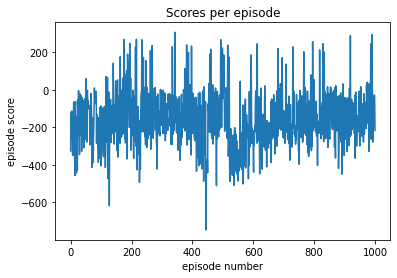

episode: 1001/1000, score: -39.110395467036426, e: 0.0099
episode: 1002/1000, score: -11.343683076055015, e: 0.0099
episode: 1003/1000, score: -79.6836819135662, e: 0.0099
episode: 1004/1000, score: -50.59537218609168, e: 0.0099
episode: 1005/1000, score: -72.12072725583681, e: 0.0099
episode: 1006/1000, score: -190.00044275439197, e: 0.0099
episode: 1007/1000, score: -219.47412452092408, e: 0.0099
episode: 1008/1000, score: -19.417359939405543, e: 0.0099
episode: 1009/1000, score: -198.13838060666495, e: 0.0099
episode: 1010/1000, score: -266.36429586681663, e: 0.0099
episode: 1011/1000, score: -62.605888675290835, e: 0.0099
episode: 1012/1000, score: -262.9506576987706, e: 0.0099
episode: 1013/1000, score: -234.6470840417321, e: 0.0099
episode: 1014/1000, score: 271.3893396617665, e: 0.0099
episode: 1015/1000, score: -230.40101608171156, e: 0.0099
episode: 1016/1000, score: -307.8777349315719, e: 0.0099
episode: 1017/1000, score: -208.3983151248517, e: 0.0099
episode: 1018/1000, scor

In [ ]:

done = False
scores = []
for e in range(3000):
  
  state = environment.reset()
  state = np.reshape(state,[1,8])
  episode_score = 0
  for time in range(700):
    # if e>400:
    #   environment.render()
    action = agent.take_action(state)
    next_state, reward, done, _ = environment.step(action)
    episode_score += reward
    next_state = np.reshape(next_state, [1, 8])
    agent.update_replay(state,action,reward,next_state,done)
    agent.replay_memory()
    #agent.replay_vectorized()
    #if reward == 100:
    #  print("winner")
    state = next_state
    if done:
      print("episode: {}/1000, score: {}, e: {:.2}".format(e,episode_score,agent.epsilon))
      break
  scores.append(episode_score)
  if e>=99:
    if e%20 == 0:
      #plotchart(np.arange(len(scores)),scores,"episode number","episode score","Scores per episode","trainingscoresperepisode.png")
      print("rolling average")
      print(np.mean(np.array(scores)[e-99:e]))
    if np.mean(np.array(scores)[e-99:e])>=200:
      agent.model.save("model.h5")
      plotchart(np.arange(len(scores)),scores,"episode number","episode score","Scores per episode, gamma .99","trainingscoresperepisode"+str(e)+".png")
      break
  
  
  if e%200 == 0:
    plotchart(np.arange(len(scores)),scores,"episode number","episode score","Scores per episode","trainingscoresperepisode"+str(e)+".png")
  if agent.epsilon>.01:
    agent.epsilon *= agent.epsilon_decay

  

environment.close()